In [1]:
pip install networkx matplotlib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
# 1. Creating a directed weighted graph representing city roads
G = nx.DiGraph()

# Add intersections (nodes)
G.add_nodes_from(range(1, 10))

# Add roads (edges with traffic weights as 'length')
roads = [
    (1, 2, 5), (2, 3, 4), (3, 6, 8), (6, 9, 6),
    (1, 4, 6), (4, 5, 3), (5, 6, 4), (2, 5, 7),
    (4, 7, 5), (7, 8, 3), (8, 9, 2), (5, 8, 6)
]
G.add_weighted_edges_from(roads, weight='length')

In [4]:
# 2. Analysing the shortest path from source to destination
source, destination = 1, 9
path = nx.shortest_path(G, source=source, target=destination, weight='length')
path_length = nx.shortest_path_length(G, source=source, target=destination, weight='length')

print(f"Shortest path from {source} to {destination}: {path}")
print(f"Total travel distance: {path_length} units")


Shortest path from 1 to 9: [1, 4, 7, 8, 9]
Total travel distance: 16 units


In [5]:
# 3. Edging betweenness centrality (bottleneck roads)
centrality = nx.edge_betweenness_centrality(G, weight='length')
top_edges = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nMost critical roads (by edge betweenness centrality):")
for edge, score in top_edges:
    print(f"Road {edge} → Centrality: {score:.4f}")


Most critical roads (by edge betweenness centrality):
Road (1, 4) → Centrality: 0.0833
Road (4, 7) → Centrality: 0.0833
Road (7, 8) → Centrality: 0.0833


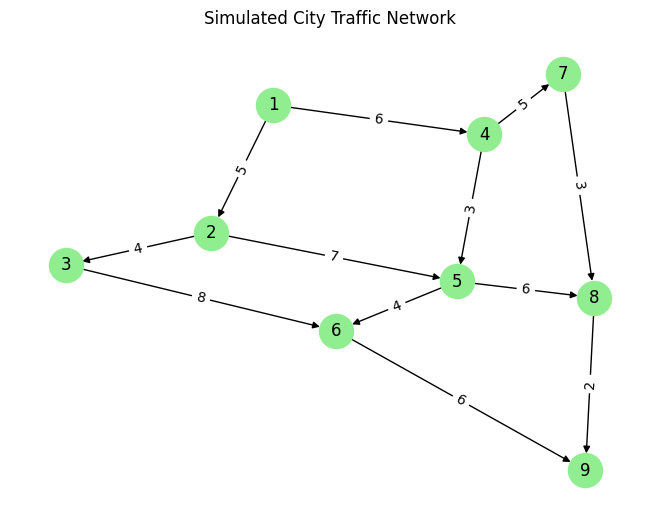

In [6]:
# 4. Visualising the network
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'length')
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=600, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Simulated City Traffic Network")
plt.show()

An arrow 2 → 5 labeled “7” means “you can drive from intersection 2 to intersection 5, and that trip costs 7 units.”

An arrow 6 → 9 labeled “6” means “from 6 to 9 costs 6 units.”

There is no road (in this toy example) from, say, 5 directly back to 2, so you couldn’t go 5 → 2.